In [1]:
import os
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
os.chdir(r"C:\Users\mehul\Time_Series_Analysis")
from predictions import *

In [2]:
df_ethm_cl = predictions("ethereum_classic_price.csv")
df_ethm_cl.data = df_ethm_cl.data.reindex(index=df_ethm_cl.data.index[::-1])

            Open  High   Low  Close        Volume    Market Cap    Mean
2016-08-01  1.79  2.34  1.78   2.34   4,59,24,200  14,75,48,000  2.0625
2016-08-02  2.36  3.53  2.31   2.76  14,78,55,000  19,43,18,000  2.7400
2016-08-03  2.78  3.20  2.36   2.60   7,41,84,500  22,87,12,000  2.7350
2016-08-04  2.59  2.76  2.10   2.34   4,35,16,500  21,33,75,000  2.4475
2016-08-05  2.35  2.60  2.28   2.59   2,02,54,400  19,34,12,000  2.4550
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 569 entries, 2016-08-01 to 2018-02-20
Freq: D
Data columns (total 7 columns):
Open          569 non-null float64
High          569 non-null float64
Low           569 non-null float64
Close         569 non-null float64
Volume        569 non-null object
Market Cap    569 non-null object
Mean          569 non-null float64
dtypes: float64(5), object(2)
memory usage: 35.6+ KB
None
---------------------------------------------------------------
Open    

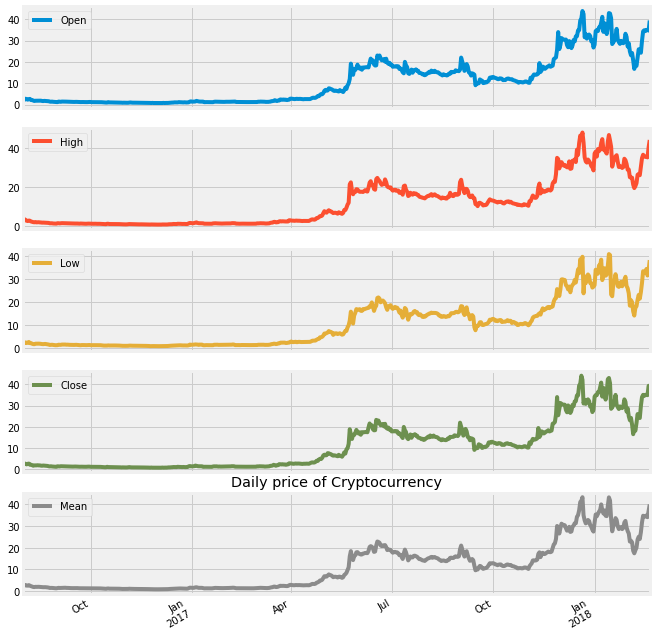

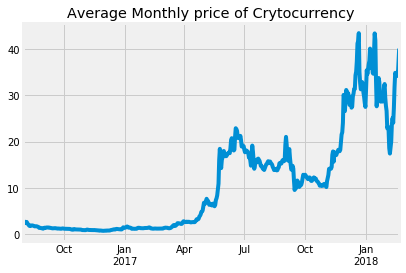

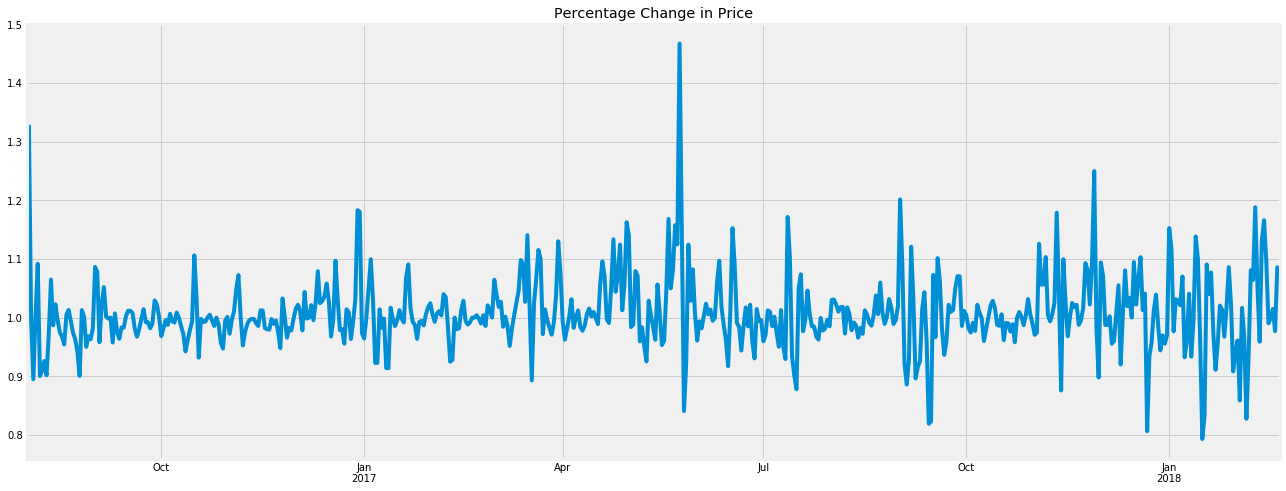

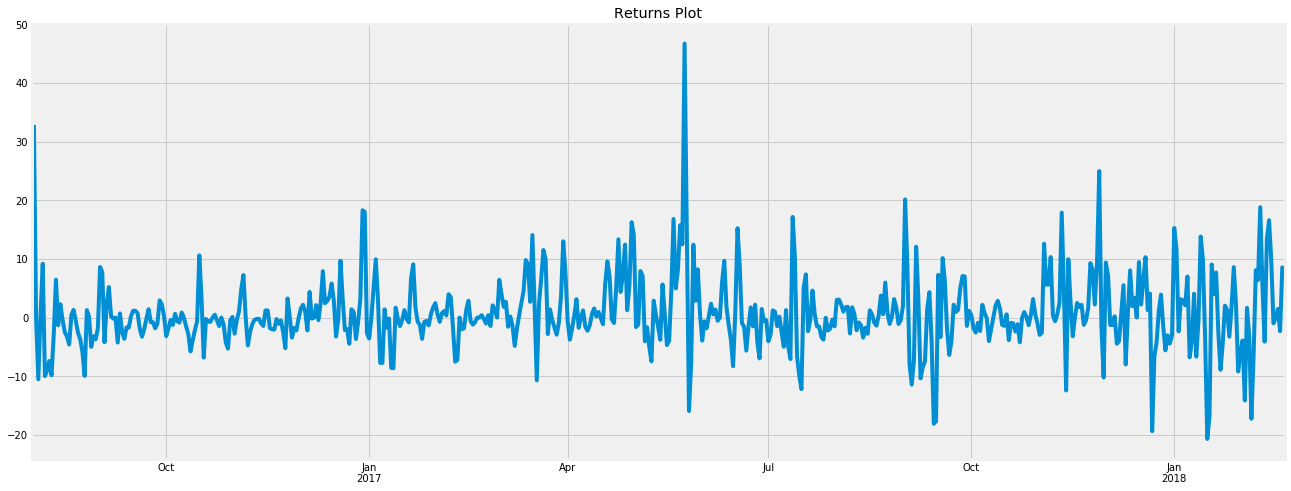

C:\Users\mehul\Time_Series_Analysis\predictions.py:59: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolmean = self.data.Mean.rolling(30).mean()
C:\Users\mehul\Time_Series_Analysis\predictions.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolstd = self.data.Mean.rolling(30).std()


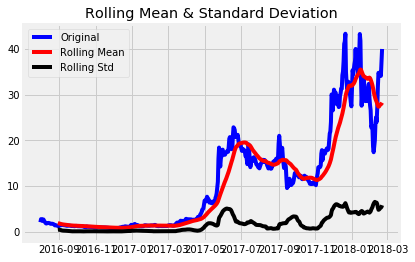

Results of Dickey-Fuller Test
Test Statistic                  -0.329085
p-value                          0.921283
#Lags Used                      19.000000
Number of Observations Used    549.000000
Critical Value(1%)              -3.442317
Critical Value(5%)              -2.866819
Critical Value(10%)             -2.569582
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            2.324289
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                  0.050
P-value                         0.962
Lags                               19
------------------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [3]:
df_ethm_cl.description()
df_ethm_cl.missing()
df_ethm_cl.plot_daily()
df_ethm_cl.plot_monthly()
df_ethm_cl.Percent_change()
df_ethm_cl.Returns()
df_ethm_cl.stationarity_test()

In [4]:
df_ethm_cl.data = df_ethm_cl.data["2017-01-01":]

In [5]:
from Model import *

In [7]:
dash_ret = model(df_ethm_cl.data)

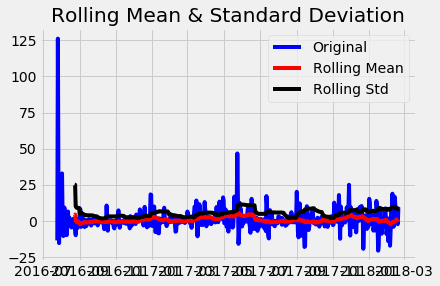

Results of Dickey-Fuller Test
Test Statistic                -9.422341e+00
p-value                        5.460606e-16
#Lags Used                     4.000000e+00
Number of Observations Used    5.710000e+02
Critical Value(1%)            -3.441854e+00
Critical Value(5%)            -2.866615e+00
Critical Value(10%)           -2.569473e+00
dtype: float64
Results of KPSS Test:
------------------------------------------------------------------------------
Test Statistic            0.065615
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                -19.505
P-value                         0.000
Lags                               19
----------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [6]:
dash_ret.stationarity_test()

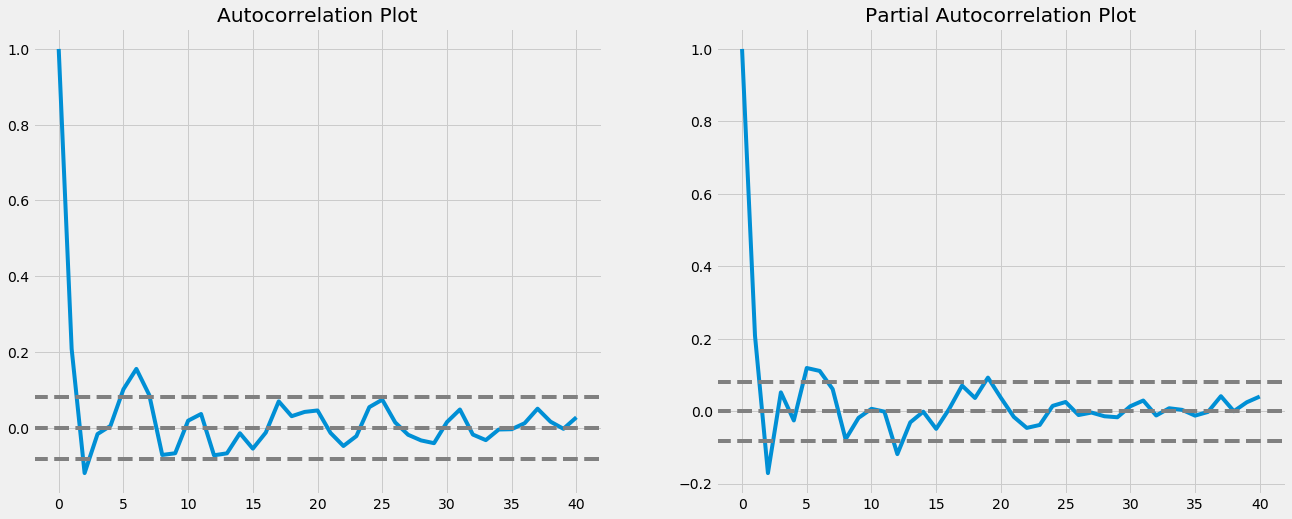

In [7]:
dash_ret.lags()

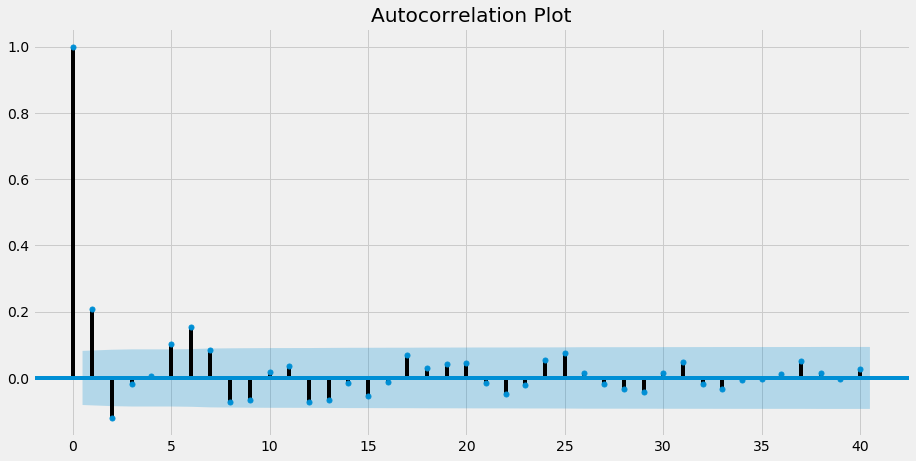

In [8]:
dash_ret.auto_graphics()

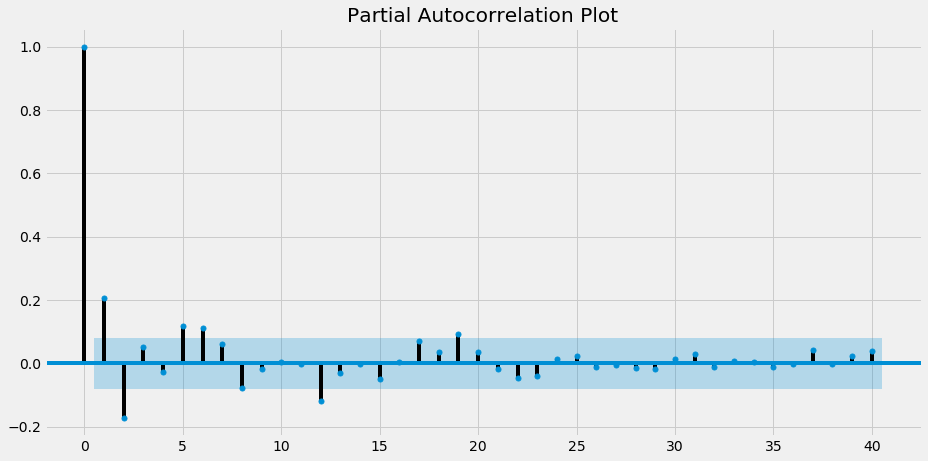

In [9]:
dash_ret.partial_graphics()

In [10]:
dash_ret.ARIMA_model(1,1)

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                           Results: ARMA
Model:              ARMA             BIC:                 4004.0489 
Dependent Variable: Returns          Log-Likelihood:      -1989.3   
Date:               2019-10-20 13:48 Scale:               1.0000    
No. Observations:   576              Method:              css-mle   
Df Model:           3                Sample:              07-25-2016
Df Residuals:       573                                   02-20-2018
Converged:          1.0000           S.D. of innovations: 7.647     
No. Iterations:     9.0000           HQIC:                3993.420  
AIC:                3986.6244                                       
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const             0.8955    0.4024   2.2256  0.0264   0.1069   1.6841
ar.L1.Returns    -0.4653    0.0617  -7.5445  0.0000  -0.58

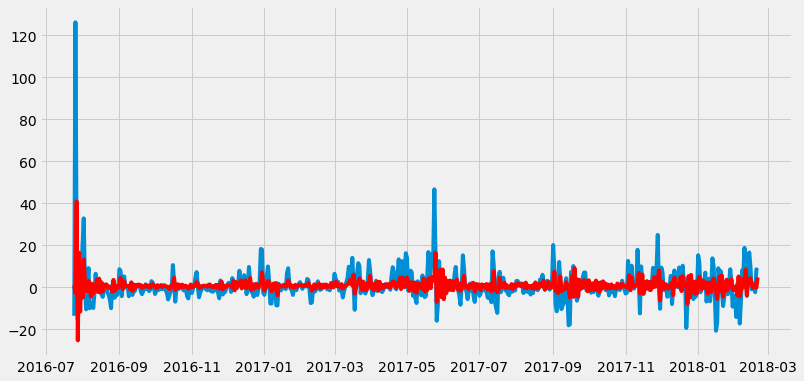

In [11]:
dash_ret.plot_predict()

In [12]:
mse = ((dash_ret.data.Returns-dash_ret.results.fittedvalues)**2).mean()
RSS = sum((dash_ret.data.Returns-dash_ret.results.fittedvalues)**2)
print(f' Residual Sum of Squares: {RSS}')
print(f' Mean Squared Errot: {mse}')
print(f' Root Mean Squared Errot: {round(np.sqrt(mse),2)}')

 Residual Sum of Squares: 35495.54971549212
 Mean Squared Errot: 61.624218256062704
 Root Mean Squared Errot: 7.85


In [4]:
from produce_predict import *

In [5]:
#This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” 
#to find the optimal set of parameters that yields the best performance for our model.
ethm_sarima = produce_predict(df_ethm_cl.data)  

In [6]:
ethm_sarima.order()

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:4718.348696911149
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:4021.486625716736
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:3474.761194868811
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:3307.553433170252
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:3480.8291429362944
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:3474.51594688605
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:3315.2172809056156
ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:3307.8357731379765
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:3954.097657329966
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:3316.0350038886263
ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:2803.643425156288
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:2676.3226891499444
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:2814.595146732105
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:2808.0459045493826
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:2685.0661790963322
ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:2678.3228173164975
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:1766.977951492991
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:1703.4880072170165
ARIMA(0, 1, 0)x(0, 1, 0, 30) - AIC:199

In [7]:
ethm_sarima.sarima_model((1,1,1),(0,1,1,30))

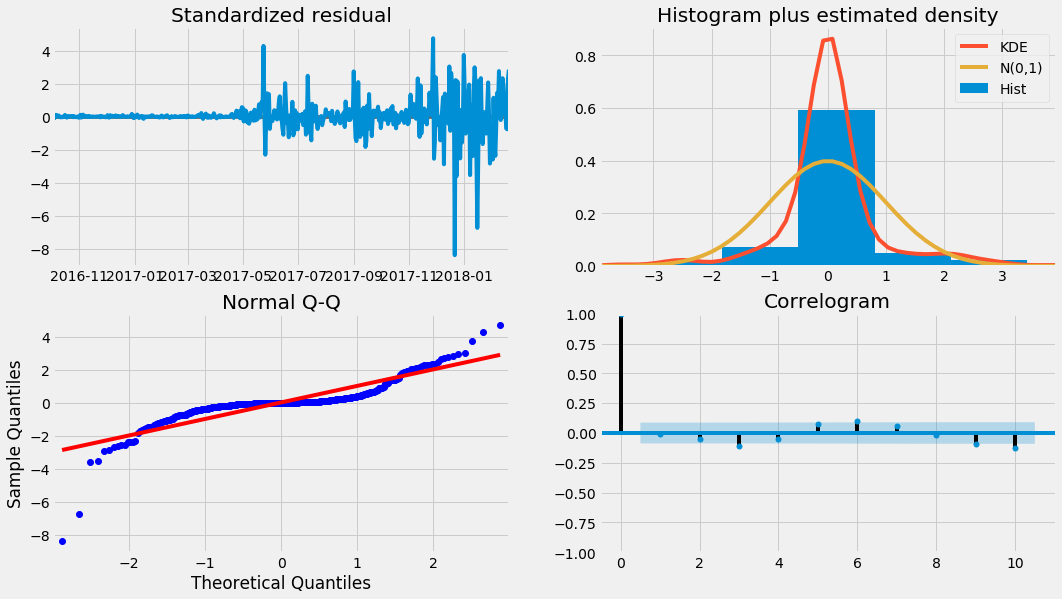

In [11]:
ethm_sarima.diagnostics()

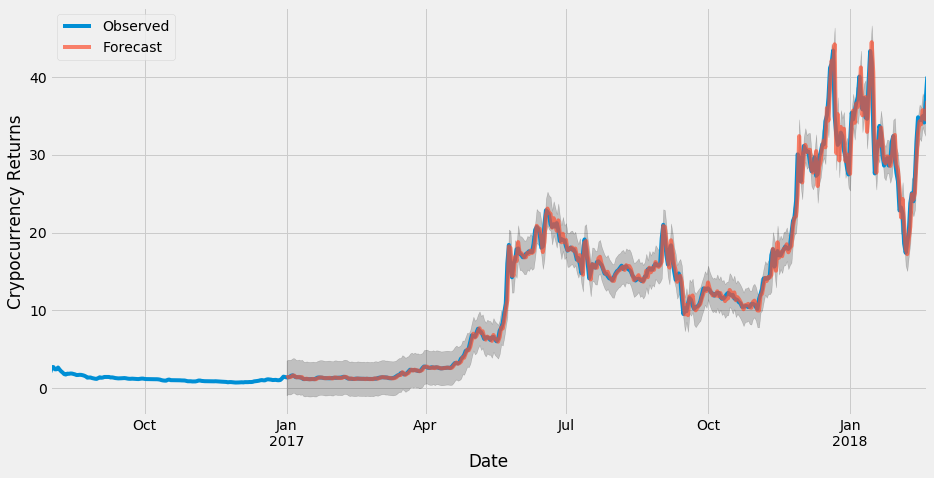

In [12]:
ethm_sarima.pred_vs_actual()

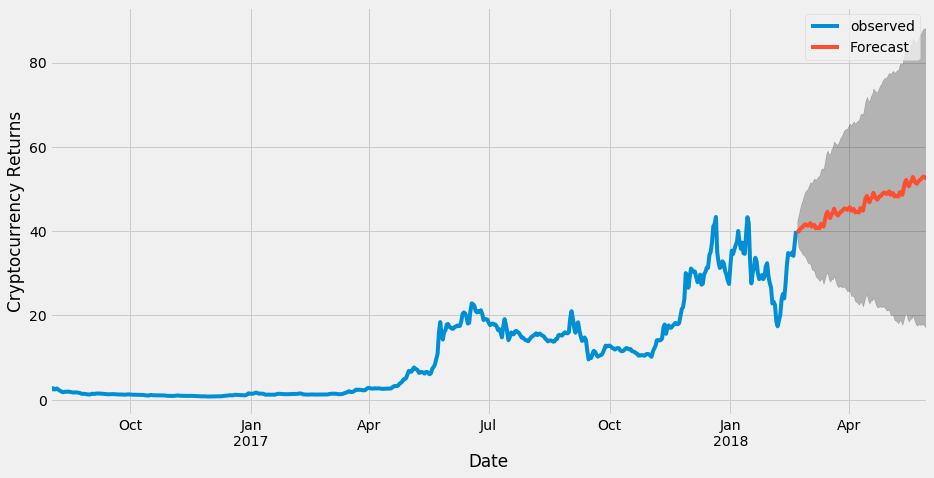

In [13]:
ethm_sarima.produce_forecast()

In [2]:
from fbprophet import Prophet
from prophet_model import *

In [3]:
ethm_pro = prophet_model("ethereum_classic_price.csv",153)

In [4]:
ethm_pro.model()

<Figure size 1296x432 with 0 Axes>

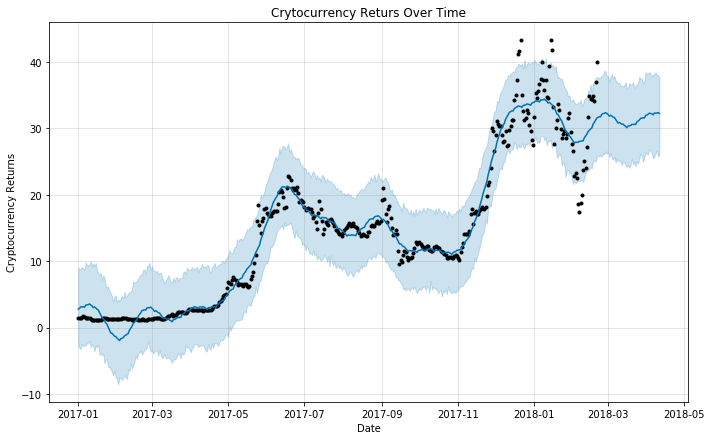

In [5]:
ethm_pro.forecast()

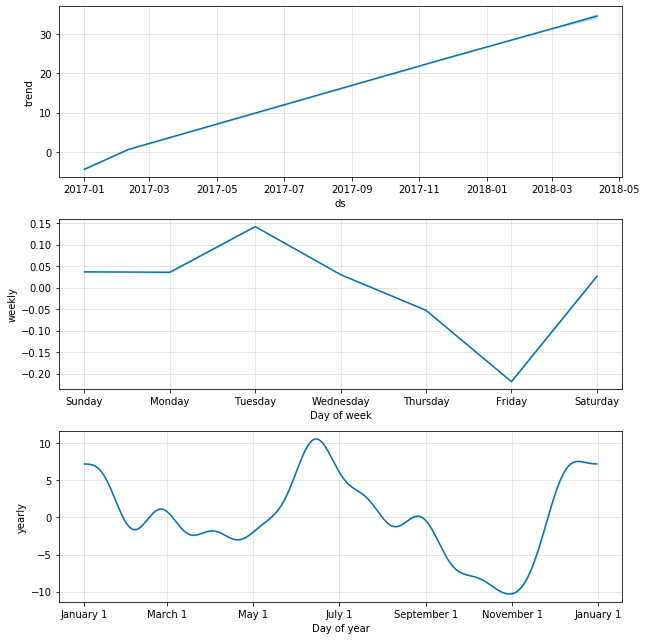

In [6]:
ethm_pro.Vizualization()

In [5]:
from VaR import *
var = Var(df_ethm_cl.data)

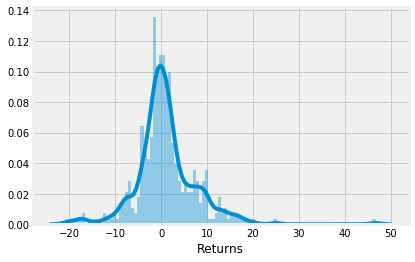

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -7.36544
95%                           -9.73795
99%                          -14.1884


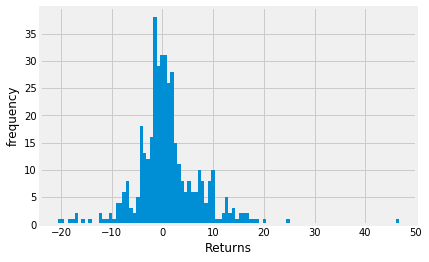

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -5.28866
95%                           -8.06565
99%                          -17.1864


In [6]:
var.var_cov(100)
var.hist_sim(100)

In [7]:
var.monte_carlo()

Simulated VAR is  -114.15673513297641
